In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style(style='darkgrid')

In [2]:
df = pd.read_csv('aug_train.csv')

In [3]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [5]:
df.isna().sum()/len(df) *100

enrollee_id                0.000000
city                       0.000000
city_development_index     0.000000
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
last_new_job               2.207955
training_hours             0.000000
target                     0.000000
dtype: float64

# Filling Missing Values

In [6]:
df.drop(columns=['enrollee_id'],axis=1,inplace=True)

##Gender

Male      13221
Female     1238
Other       191
Name: gender, dtype: int64


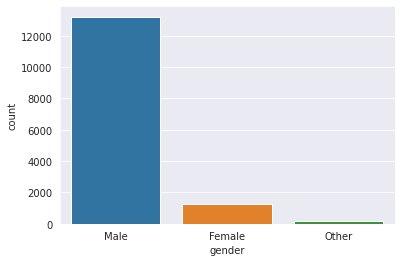

In [7]:
print(df['gender'].value_counts())
sns.countplot(x = 'gender',data=df)

In [8]:
df['gender'].fillna('Male',inplace=True)

## Enrolled University

no_enrollment       13817
Full time course     3757
Part time course     1198
Name: enrolled_university, dtype: int64


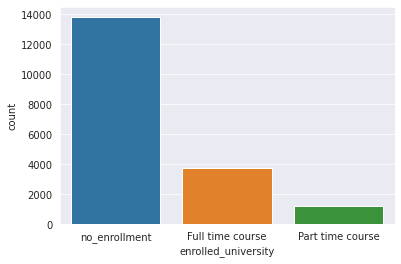

In [9]:
print(df['enrolled_university'].value_counts())
sns.countplot(x = 'enrolled_university',data=df)

In [10]:
df['enrolled_university'] = df['enrolled_university'].fillna('no_enrollment')

## Education Level

Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: education_level, dtype: int64


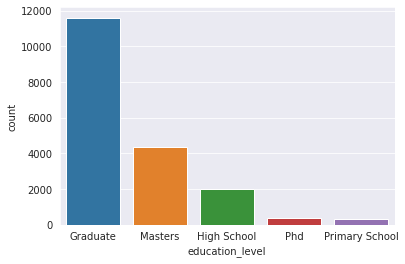

In [11]:
print(df['education_level'].value_counts())
sns.countplot(x = 'education_level',data=df)

In [12]:
df['education_level'] = df['education_level'].fillna('Graduate')

## Major Discipline

STEM               14492
Humanities           669
Other                381
Business Degree      327
Arts                 253
No Major             223
Name: major_discipline, dtype: int64


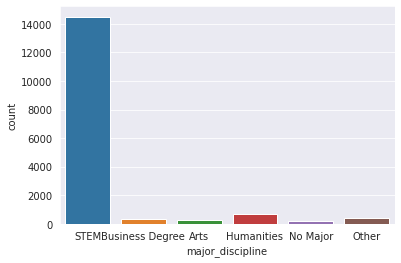

In [13]:
print(df['major_discipline'].value_counts())
sns.countplot(x = 'major_discipline',data=df)

In [14]:
df['major_discipline'] = df['major_discipline'].fillna('STEM')

## Experience

>20    3286
5      1430
4      1403
3      1354
6      1216
2      1127
7      1028
10      985
9       980
8       802
15      686
11      664
14      586
1       549
<1      522
16      508
12      494
13      399
17      342
19      304
18      280
20      148
Name: experience, dtype: int64


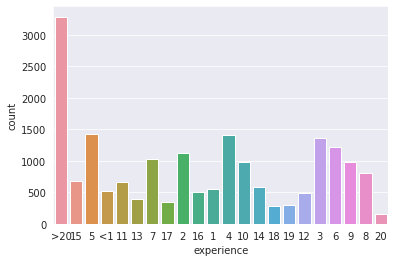

In [15]:
print(df['experience'].value_counts())
sns.countplot(x = 'experience',data=df)

In [16]:
df['experience'] = df['experience'].fillna('>20')

## Company_size and Company_type

In [17]:
#Missing Data > 30%
df.drop(['company_size','company_type'],axis=1,inplace=True)

## Last New Job

1        8040
>4       3290
2        2900
never    2452
4        1029
3        1024
Name: last_new_job, dtype: int64


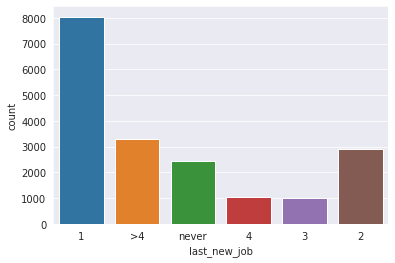

In [18]:
print(df['last_new_job'].value_counts())
sns.countplot(x = 'last_new_job',data=df)

In [19]:
df['last_new_job'] = df['last_new_job'].fillna('1')

In [20]:
df.isna().sum()

city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
last_new_job              0
training_hours            0
target                    0
dtype: int64

In [21]:
df.duplicated().sum()

467

# Converting columns to numeric

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    19158 non-null  object 
 1   city_development_index  19158 non-null  float64
 2   gender                  19158 non-null  object 
 3   relevent_experience     19158 non-null  object 
 4   enrolled_university     19158 non-null  object 
 5   education_level         19158 non-null  object 
 6   major_discipline        19158 non-null  object 
 7   experience              19158 non-null  object 
 8   last_new_job            19158 non-null  object 
 9   training_hours          19158 non-null  int64  
 10  target                  19158 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 1.6+ MB


In [23]:
df.head()

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,last_new_job,training_hours,target
0,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,1,36,1.0
1,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,>4,47,0.0
2,city_21,0.624,Male,No relevent experience,Full time course,Graduate,STEM,5,never,83,0.0
3,city_115,0.789,Male,No relevent experience,no_enrollment,Graduate,Business Degree,<1,never,52,1.0
4,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,4,8,0.0


In [24]:
df['experience'].value_counts()

>20    3351
5      1430
4      1403
3      1354
6      1216
2      1127
7      1028
10      985
9       980
8       802
15      686
11      664
14      586
1       549
<1      522
16      508
12      494
13      399
17      342
19      304
18      280
20      148
Name: experience, dtype: int64

In [25]:
df['experience'].replace({'>20':21 , '<1':0},inplace=True)
df['experience']=pd.to_numeric(df['experience'])

In [26]:
df['last_new_job'].value_counts()

1        8463
>4       3290
2        2900
never    2452
4        1029
3        1024
Name: last_new_job, dtype: int64

In [27]:
df['last_new_job'].replace({'>4':5 , 'never':0},inplace=True)
df['last_new_job']=pd.to_numeric(df['last_new_job'])

In [28]:
df['city'] = df['city'].str[5:]
df['city'] = pd.to_numeric(df['city'])

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    19158 non-null  int64  
 1   city_development_index  19158 non-null  float64
 2   gender                  19158 non-null  object 
 3   relevent_experience     19158 non-null  object 
 4   enrolled_university     19158 non-null  object 
 5   education_level         19158 non-null  object 
 6   major_discipline        19158 non-null  object 
 7   experience              19158 non-null  int64  
 8   last_new_job            19158 non-null  int64  
 9   training_hours          19158 non-null  int64  
 10  target                  19158 non-null  float64
dtypes: float64(2), int64(4), object(5)
memory usage: 1.6+ MB


# Data Visualization

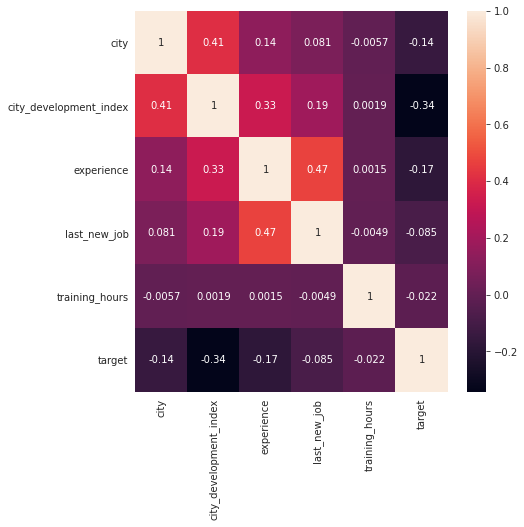

In [30]:
plt.figure(figsize=(7,7))
sns.heatmap(df.corr(),annot=True)
plt.show()

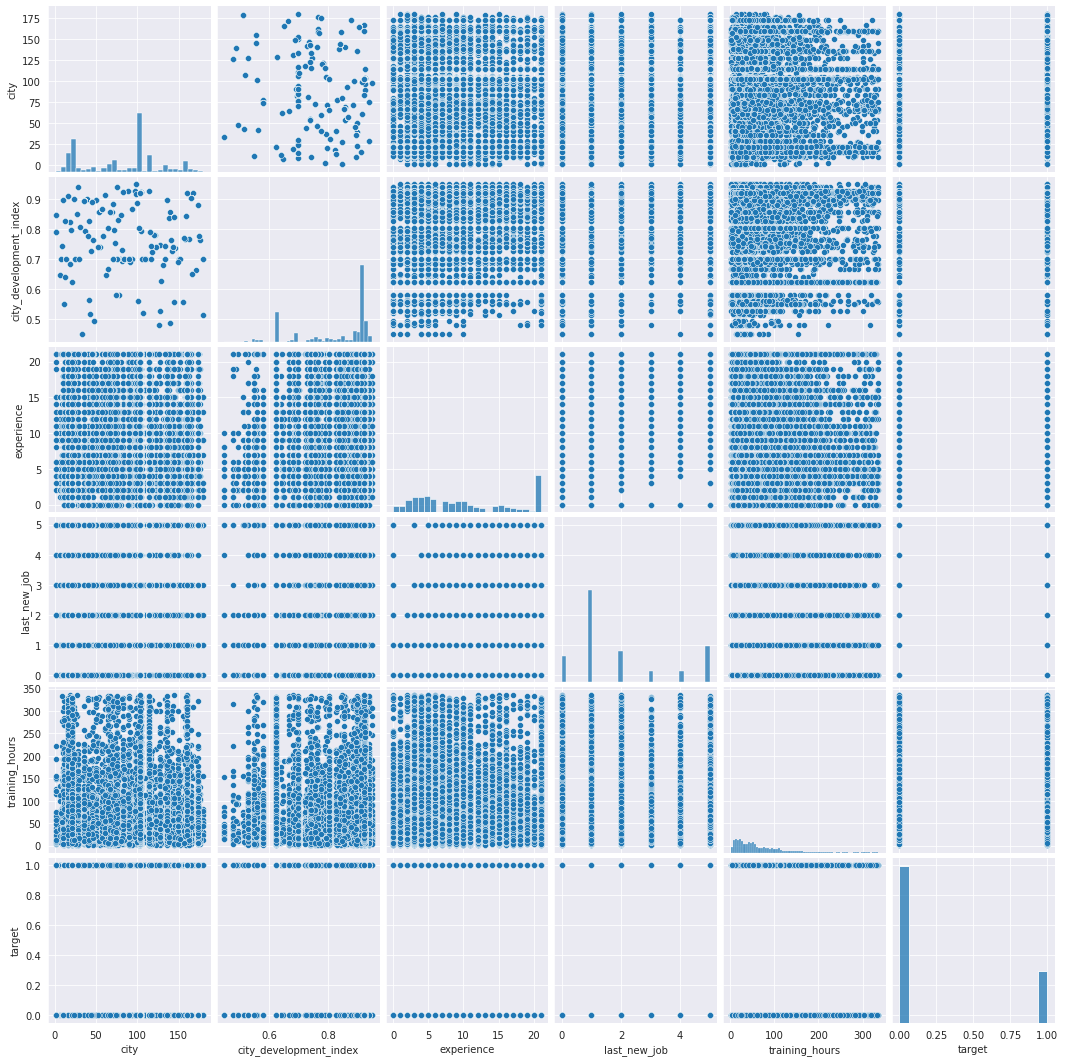

In [31]:
sns.pairplot(df)

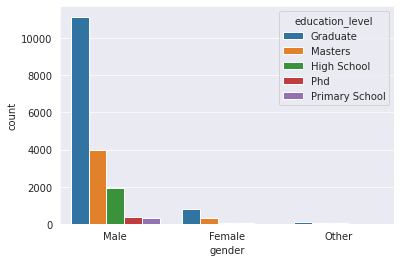

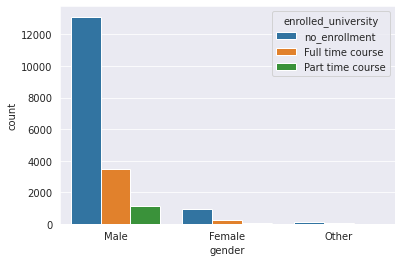

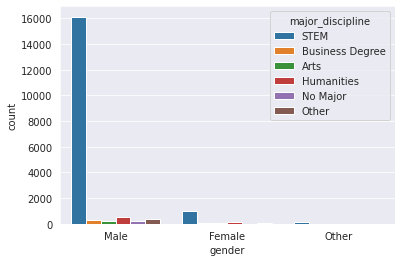

In [32]:
cols = ['education_level','enrolled_university','major_discipline']
for col in cols:
  sns.countplot(x='gender',hue=col,data=df)
  plt.show()

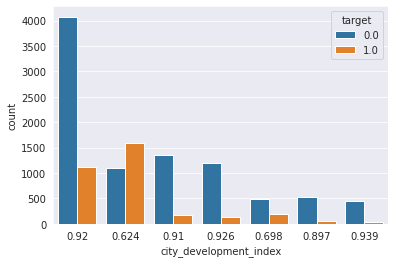

In [33]:
sns.countplot(x='city_development_index',hue='target',data=df,order=df['city_development_index'].value_counts().index[:7])

# Column Transformation

In [34]:
#OneHotEncoding 
df = pd.get_dummies(columns=['gender','relevent_experience','enrolled_university','education_level','major_discipline'],drop_first=True,data=df)

In [35]:
df.head()

,city,city_development_index,experience,last_new_job,training_hours,target,gender_Male,gender_Other,relevent_experience_No relevent experience,enrolled_university_Part time course,enrolled_university_no_enrollment,education_level_High School,education_level_Masters,education_level_Phd,education_level_Primary School,major_discipline_Business Degree,major_discipline_Humanities,major_discipline_No Major,major_discipline_Other,major_discipline_STEM
0,103,0.920,21,1,36,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,1
1,40,0.776,15,5,47,0.0,1,0,1,0,1,0,0,0,0,0,0,0,0,1
2,21,0.624,5,0,83,0.0,1,0,1,0,0,0,0,0,0,0,0,0,0,1
3,115,0.789,0,0,52,1.0,1,0,1,0,1,0,0,0,0,1,0,0,0,0
4,162,0.767,21,4,8,0.0,1,0,0,0,1,0,1,0,0,0,0,0,0,1


# Model Training

In [36]:
y=df['target']
x=df.drop('target',axis=1)

In [37]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,shuffle=True)

In [38]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [39]:
from catboost import CatBoostClassifier as cb
classifier = cb(silent=True)
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)
print(classifier.__class__.__name__)
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm = confusion_matrix(y_test,y_pred)
print(cm)
acc = accuracy_score(y_test,y_pred)*100
print('Accuracy: {:.2f} %'.format(acc))

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X =x_train, y = y_train, cv = 10)
print('Cross Validation')
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

CatBoostClassifier
[[2603  291]
 [ 537  401]]
Accuracy: 78.39 %
Cross Validation
Accuracy: 77.37 %
Standard Deviation: 1.00 %


## For test set

In [40]:
df_test = pd.read_csv('aug_test.csv')
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129 entries, 0 to 2128
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             2129 non-null   int64  
 1   city                    2129 non-null   object 
 2   city_development_index  2129 non-null   float64
 3   gender                  1621 non-null   object 
 4   relevent_experience     2129 non-null   object 
 5   enrolled_university     2098 non-null   object 
 6   education_level         2077 non-null   object 
 7   major_discipline        1817 non-null   object 
 8   experience              2124 non-null   object 
 9   company_size            1507 non-null   object 
 10  company_type            1495 non-null   object 
 11  last_new_job            2089 non-null   object 
 12  training_hours          2129 non-null   int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 216.4+ KB


In [41]:
df_test.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72


In [42]:
df_test.isna().sum()

enrollee_id                 0
city                        0
city_development_index      0
gender                    508
relevent_experience         0
enrolled_university        31
education_level            52
major_discipline          312
experience                  5
company_size              622
company_type              634
last_new_job               40
training_hours              0
dtype: int64

In [43]:
df_test_enrolle_id = df_test['enrollee_id']
df_test.drop(columns=['enrollee_id','company_size','company_type'],axis=1,inplace=True)

1        884
>4       353
2        342
never    258
3        133
4        119
Name: last_new_job, dtype: int64


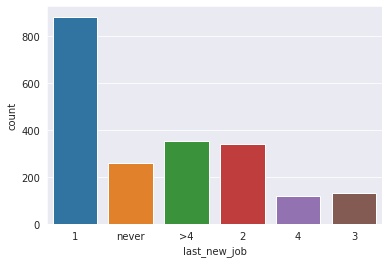

In [44]:
print(df_test['last_new_job'].value_counts())
sns.countplot(x = 'last_new_job',data=df_test)

In [45]:
df_test['last_new_job'] = df_test['last_new_job'].fillna('1')

no_enrollment       1519
Full time course     435
Part time course     144
Name: enrolled_university, dtype: int64


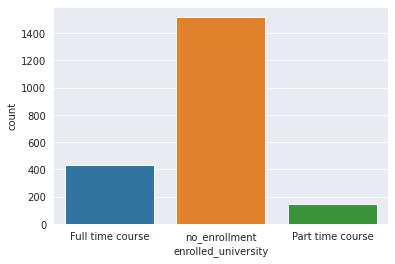

In [46]:
print(df_test['enrolled_university'].value_counts())
sns.countplot(x = 'enrolled_university',data=df_test)

In [47]:
df_test['enrolled_university'] = df_test['enrolled_university'].fillna('no_enrollment')

Graduate          1269
Masters            496
High School        222
Phd                 54
Primary School      36
Name: education_level, dtype: int64


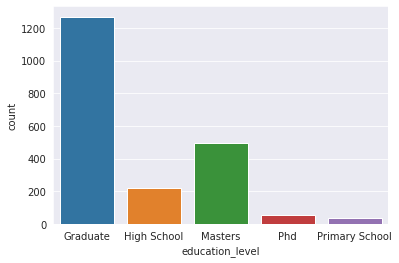

In [48]:
print(df_test['education_level'].value_counts())
sns.countplot(x = 'education_level',data=df_test)

In [49]:
df_test['education_level'] = df_test['education_level'].fillna('Graduate')

STEM               1621
Humanities           80
Other                40
Business Degree      37
No Major             22
Arts                 17
Name: major_discipline, dtype: int64


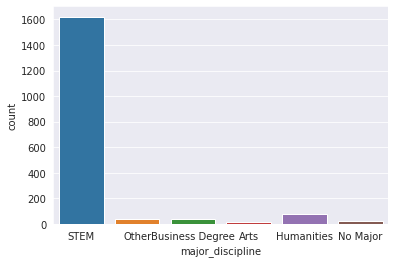

In [50]:
print(df_test['major_discipline'].value_counts())
sns.countplot(x = 'major_discipline',data=df_test)

In [51]:
df_test['major_discipline'] = df_test['major_discipline'].fillna('STEM')

>20    383
5      163
3      154
4      145
6      130
2      128
7      116
9      113
10      96
11      86
8       82
<1      74
16      68
15      59
1       56
14      55
13      54
12      52
17      36
19      29
18      26
20      19
Name: experience, dtype: int64


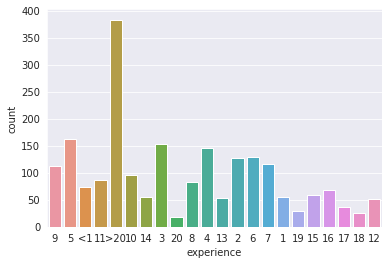

In [52]:
print(df_test['experience'].value_counts())
sns.countplot(x = 'experience',data=df_test)

In [53]:
df_test['experience'] = df_test['experience'].fillna('>20')

Male      1460
Female     137
Other       24
Name: gender, dtype: int64


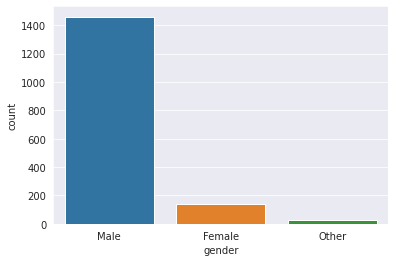

In [54]:
print(df_test['gender'].value_counts())
sns.countplot(x = 'gender',data=df_test)

In [55]:
df_test['gender'].fillna('Male',inplace=True)

In [56]:
df_test['experience'].replace({'>20':21 , '<1':0},inplace=True)
df_test['experience']=pd.to_numeric(df_test['experience'])

df_test['last_new_job'].replace({'>4':5 , 'never':0},inplace=True)
df_test['last_new_job']=pd.to_numeric(df_test['last_new_job'])

df_test['city'] = df_test['city'].str[5:]
df_test['city'] = pd.to_numeric(df_test['city'])

# # df_test.dropna(subset=['gender'],inplace=True)
# df_test['gender'].fillna('Male',inplace=True)

In [57]:
df_test = pd.get_dummies(columns=['gender','relevent_experience','enrolled_university','education_level','major_discipline'],drop_first=True,data=df_test)

In [58]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129 entries, 0 to 2128
Data columns (total 19 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   city                                        2129 non-null   int64  
 1   city_development_index                      2129 non-null   float64
 2   experience                                  2129 non-null   int64  
 3   last_new_job                                2129 non-null   int64  
 4   training_hours                              2129 non-null   int64  
 5   gender_Male                                 2129 non-null   uint8  
 6   gender_Other                                2129 non-null   uint8  
 7   relevent_experience_No relevent experience  2129 non-null   uint8  
 8   enrolled_university_Part time course        2129 non-null   uint8  
 9   enrolled_university_no_enrollment           2129 non-null   uint8  
 10  education_le

In [59]:
df_test.isna().sum()

city                                          0
city_development_index                        0
experience                                    0
last_new_job                                  0
training_hours                                0
gender_Male                                   0
gender_Other                                  0
relevent_experience_No relevent experience    0
enrolled_university_Part time course          0
enrolled_university_no_enrollment             0
education_level_High School                   0
education_level_Masters                       0
education_level_Phd                           0
education_level_Primary School                0
major_discipline_Business Degree              0
major_discipline_Humanities                   0
major_discipline_No Major                     0
major_discipline_Other                        0
major_discipline_STEM                         0
dtype: int64

In [60]:
#Model training
y_pred = classifier.predict(df_test)
print(y_pred.shape)
y_pred.reshape([2129,1])

(2129,)


array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [61]:
df_pred = pd.DataFrame({'enrollee_id':df_test_enrolle_id,'target':y_pred},index=None)

In [62]:
df_pred.head()

,enrollee_id,target
0,32403,0.0
1,9858,0.0
2,31806,0.0
3,27385,0.0
4,27724,0.0


In [63]:
df_pred.to_csv('my_submission.csv',index=False)